## Data Visualization

In [11]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Web scraping tools
import requests
from bs4 import BeautifulSoup

# Regular expressions for pattern matching and text extraction
import re

In [3]:
df = pd.read_csv("washing_machine_visualization_ready.csv")

In [4]:
df

Product Title  Product Price  \
0    ONIDA 6.5 kg 5 Star 10 Wash Programs, Stainles...        19990.0   
1    Voltas Beko 9 kg Fully Automatic Top Load Wash...        42990.0   
2    realme TechLife 7.5 kg 5 Star Rating Semi Auto...        13990.0   
3    realme TechLife 7 kg 5 Star rating Semi Automa...        12490.0   
4    MarQ by Flipkart 6 kg 5 Star Rating Innowash R...        11990.0   
..                                                 ...            ...   
516  Samsung 7 kg Fully Automatic Top Load Washing ...        25000.0   
517  LG 7 kg with Steam AI Direct Drive Technology ...        43990.0   
518  BOSCH 10/6 kg Washer with Dryer Inverter,1400R...        96990.0   
519  Samsung 7 kg Fully Automatic Top Load Washing ...        28190.0   
520  Voltas Beko by A Tata Product 8.5 kg Semi Auto...        21290.0   

     Product Discount Price Product Discount Rate  Product Rating  \
0                   11290.0               43% off             4.2   
1                   18480.0               57% off             4.2   
2                    7790.0               44% off             4.2   
3                    7390.0               40% off             4.2   
4                    6790.0               43% off             4.3   
..                      ...                   ...             ...   
516                 18000.0               28% off             4.1   
517                 37990.0               13% off             4.0   
518                 76494.0               21% off             4.4   
519                 25990.0                7% off             4.5   
520                 12450.0               41% off             4.1   

                                      Product Features    Brand  Weight_kg  \
0    700 rpm Max Speed5 Star Rating2 Years Comprehe...    ONIDA        6.5   
1    700 rpm Max Speed5 Star RatingWith In-Built He...   Voltas        9.0   
2    1400 RPM Max Speed5 Star Rating2 Years Warrant...   realme        7.5   
3    1400 RPM Max Speed5 Star Rating2 Years Warrant...   realme        7.0   
4    1350 rpm Max Speed5 Star Rating2 Years Warrant...     MarQ        6.0   
..                                                 ...      ...        ...   
516  680 rpm Max Speed2 Years warranty on product, ...  Samsung        7.0   
517  1200 RPM Max Speed5 Star RatingWith In-Built H...       LG        7.0   
518  1400 RPM Max SpeedWith In-Built Heater2 Years ...    BOSCH        6.0   
519  700 rpm Max Speed3 Years Comprehensive Warrant...  Samsung        7.0   
520  1300 rpm Max Speed5 Star Rating2 Years Compreh...   Voltas        8.5   

        RPM  
0     700.0  
1     700.0  
2    1400.0  
3    1400.0  
4    1350.0  
..      ...  
516   680.0  
517  1200.0  
518  1400.0  
519   700.0  
520  1300.0  

[521 rows x 9 columns]

### Univariate Analysis

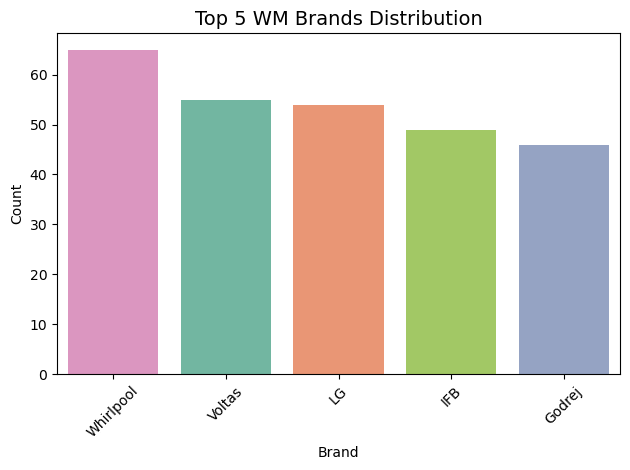

In [5]:
# Top 5 WM Brands Distribution
# Filter top 5 brands
top_5_brands = df['Brand'].value_counts().nlargest(5).index
df_top5 = df[df['Brand'].isin(top_5_brands)]

# Plot with hue and legend disabled
sns.countplot(data=df_top5, x='Brand', hue='Brand', order=top_5_brands, palette='Set2', legend=False)
plt.title('Top 5 WM Brands Distribution', fontsize=14)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observation
Whirlpool and Voltas are the top most brands and are preferred by most of the customers.They are followed by LG, IFB, and Godrej

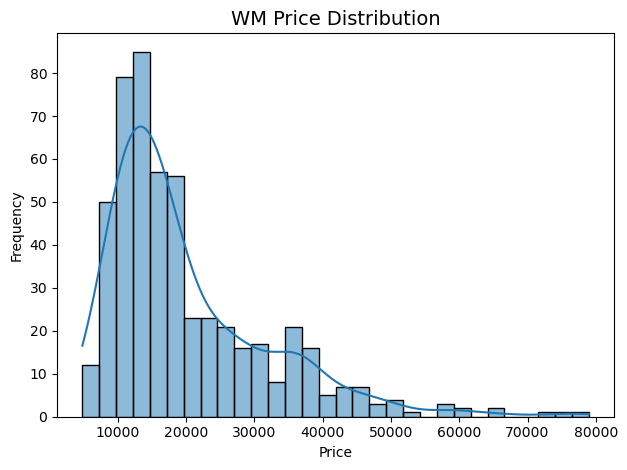

In [6]:
# WM Price Distribution
sns.histplot(df['Product Discount Price'], bins=30, kde=True)
plt.title('WM Price Distribution', fontsize=14)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Observation:
The price distribution reveals a concentration of WM in the mid-range segment.
A smooth KDE curve highlights the presence of outliers at the higher end, indicating premium models.
This helps distinguish budget, mid-range, and premium pricing clusters.

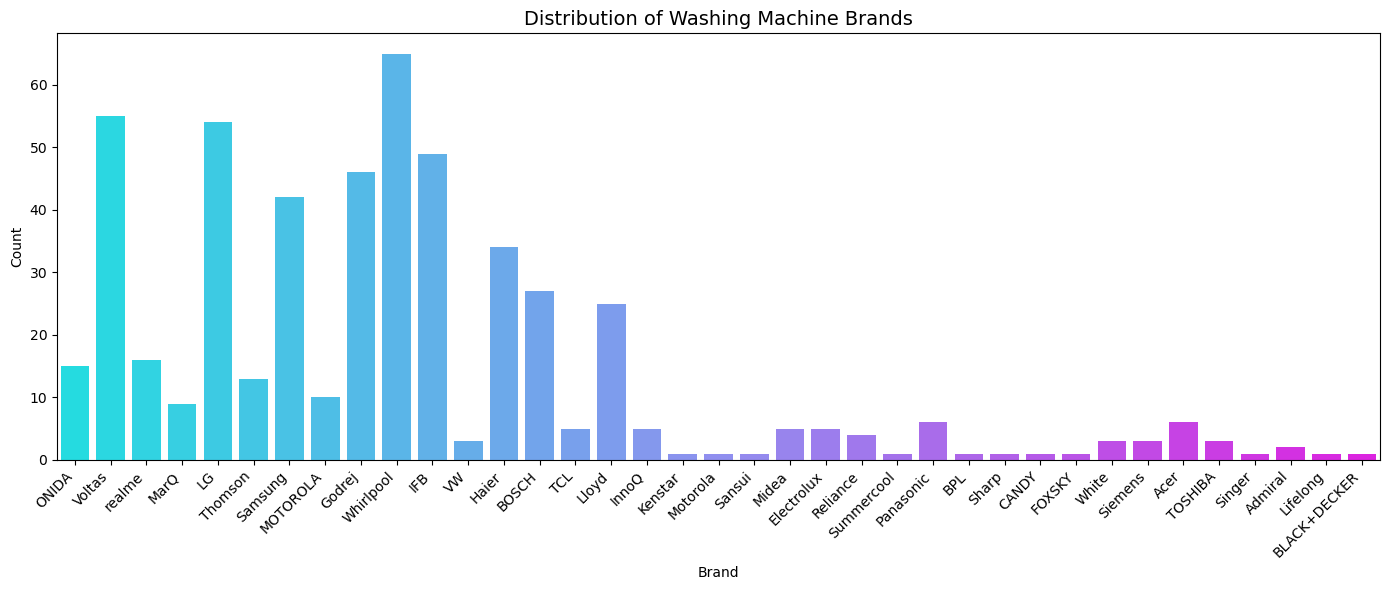

In [10]:
# Distribution of WM Brands

plt.figure(figsize=(14,6))   # increase width

sns.countplot(
    data=df,
    x='Brand',
    hue='Brand',
    palette='cool',
    legend=False
)

plt.title('Distribution of Washing Machine Brands', fontsize=14)
plt.xlabel('Brand')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')  # rotate + align
plt.tight_layout()
plt.show()

### Observation
Whirlpool is the top most brand.


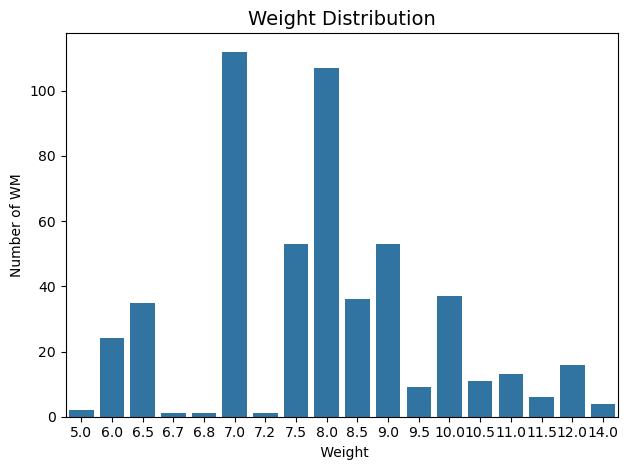

In [12]:
# Weight Distribution
sns.countplot(data=df, x='Weight_kg', color='tab:blue')
plt.title('Weight Distribution', fontsize=14)
plt.xlabel(' Weight')
plt.ylabel('Number of WM')
plt.tight_layout()
plt.show()

### Observation
 1. Most common capacity range

The highest concentration of washing machines lies between 7 kg and 8 kg.

This indicates that 7–8 kg machines dominate the market, likely because they suit average Indian households.

2. Secondary popular segment

A noticeable number of models fall in the 8.5–9 kg range.

These are typically preferred by larger families or for heavier laundry loads.

3. Low-capacity machines are fewer

Very few washing machines are below 6 kg.

This suggests declining demand for small-capacity machines.

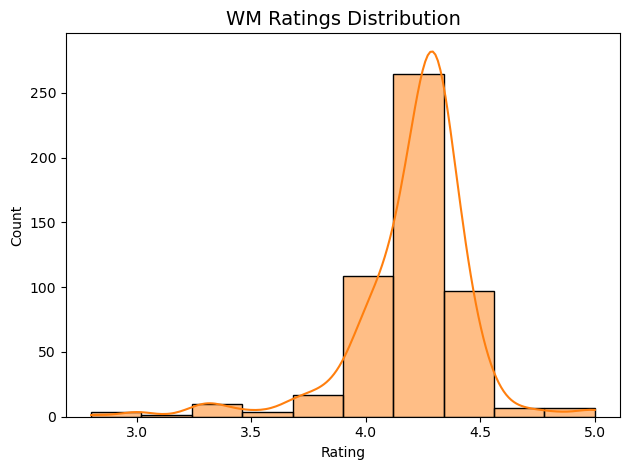

In [14]:
# Rating Distribution
sns.histplot(df['Product Rating'], bins=10, kde=True, color='tab:orange')
plt.title('WM Ratings Distribution', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### Observation
1. Ratings are highly concentrated between 4.0 and 4.5

The majority of washing machines have ratings in this range.

This indicates overall high customer satisfaction across products.

2. Peak around ~4.2 rating

The KDE curve shows a clear peak near 4.2, suggesting this is the most common rating.

Many products are consistently rated “very good.”

3. Very few low-rated products

Ratings below 3.5 are rare.

This implies fewer poor-quality or unsatisfactory models in the dataset.

## Bivariate Analysis

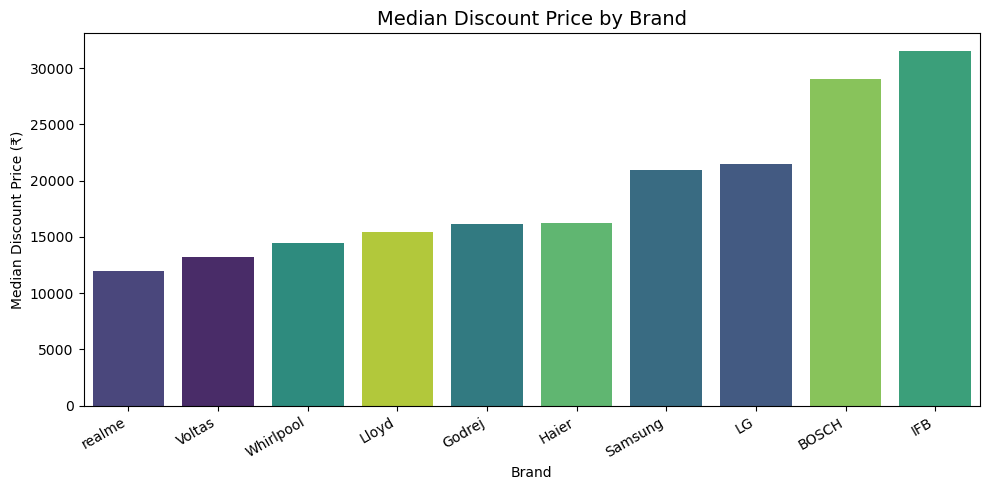

In [28]:
# Median Dscount Price by Brand
top_brands = df['Brand'].value_counts().head(10).index
df_top = df[df['Brand'].isin(top_brands)]

# Sort by median price
order = (
    df_top
    .groupby('Brand')['Product Discount Price']
    .median()
    .sort_values()
    .index
)

plt.figure(figsize=(10,5))

sns.barplot(
    data=df_top,
    x='Brand',
    y='Product Discount Price',
    hue='Brand',
    estimator='median',
    order=order,
    palette='viridis',
    errorbar=None,
    legend=False
)

plt.title('Median Discount Price by Brand', fontsize=14)
plt.xlabel('Brand')
plt.ylabel('Median Discount Price (₹)')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

### Obsevation
1. IFB and BOSCH have the highest median discounted prices, indicating that these brands primarily operate in the premium washing machine segment even after discounts.

2. Samsung and LG fall into the upper-mid price range, suggesting a balance between premium features and competitive pricing.

3. Haier, Godrej, and Whirlpool are positioned in the mid-range segment, appealing to value-conscious customers while still offering reliable features.

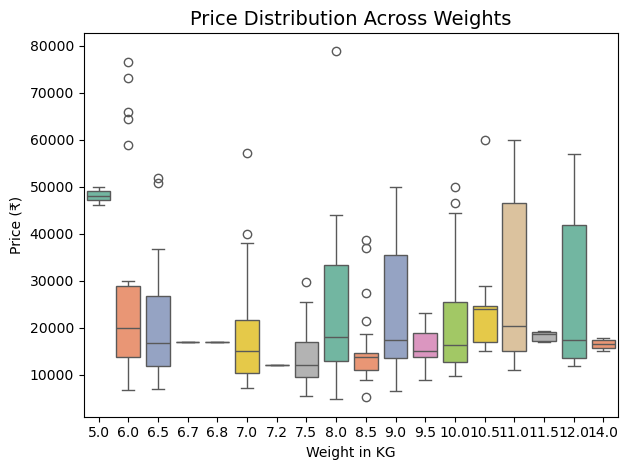

In [17]:
# Price Distribution Across RAM Sizes
sns.boxplot(data=df, x='Weight_kg', y='Product Discount Price', hue='Weight_kg', palette='Set2', dodge=False, legend=False)
plt.title('Price Distribution Across Weights', fontsize=14)
plt.xlabel('Weight in KG')
plt.ylabel('Price (₹)')
plt.tight_layout()
plt.show()

### Observation
1. General trend: Price increases with weight (capacity)

Lower-capacity machines (5–7 kg) are mostly priced in the ₹10,000–₹25,000 range.

Higher-capacity machines (10–12 kg) tend to have higher median prices, reflecting added features and suitability for large families.

2. High price variability in mid–high weights

Weights between 8–11 kg show a wide spread in prices.

This indicates multiple variants (basic vs premium models) within the same capacity.

3. Premium outliers exist at almost every weight

Some models at 6–8 kg and 9 kg reach prices above ₹60,000–₹80,000.

These outliers likely represent fully automatic, smart, or premium-brand models.

4. Entry-level pricing is consistent

The lower price bound across most weights remains around ₹8,000–₹12,000, suggesting strong competition in the budget segment.

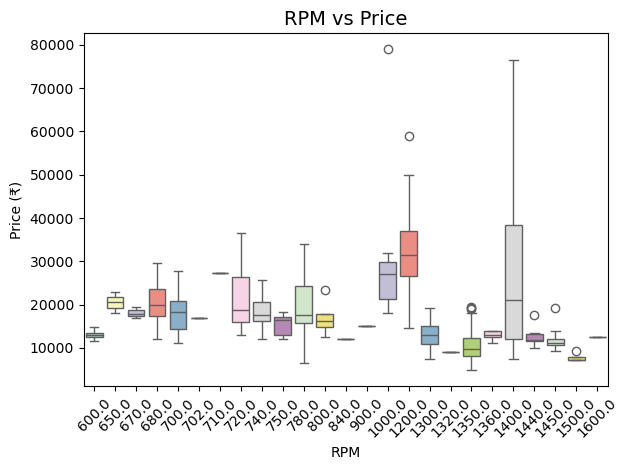

In [19]:
# RPM vs Price
sns.boxplot(data=df, x='RPM', y='Product Discount Price', hue='RPM', palette='Set3', dodge=False, legend=False)
plt.title('RPM vs Price', fontsize=14)
plt.xlabel('RPM')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observation
1. Higher RPM generally commands higher prices

Washing machines with lower RPM (600–800) are mostly priced in the ₹10,000–₹20,000 range.

High RPM models (1000–1400 RPM) show noticeably higher median prices, indicating premium positioning.

2. Price variability increases with RPM

Mid to high RPM categories (900–1200 RPM) show a wide price spread.

This suggests the presence of both mid-range and premium models within the same RPM range.

3. Premium outliers at higher RPMs

Significant high-price outliers appear around 1000 RPM and 1400 RPM, with prices reaching ₹60,000–₹80,000.

These likely represent feature-rich, inverter motor, or smart washing machines.

4. Lower RPM models are more price-stable

RPM ranges 600–750 have tighter boxplots, indicating consistent and budget-friendly pricing.

5. RPM alone does not determine price

Some lower RPM models are priced higher than higher RPM budget models.

This implies that brand reputation, capacity, automation type, and additional features strongly influence price

C:\Users\Sanchit\AppData\Local\Temp\ipykernel_4532\1316764405.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


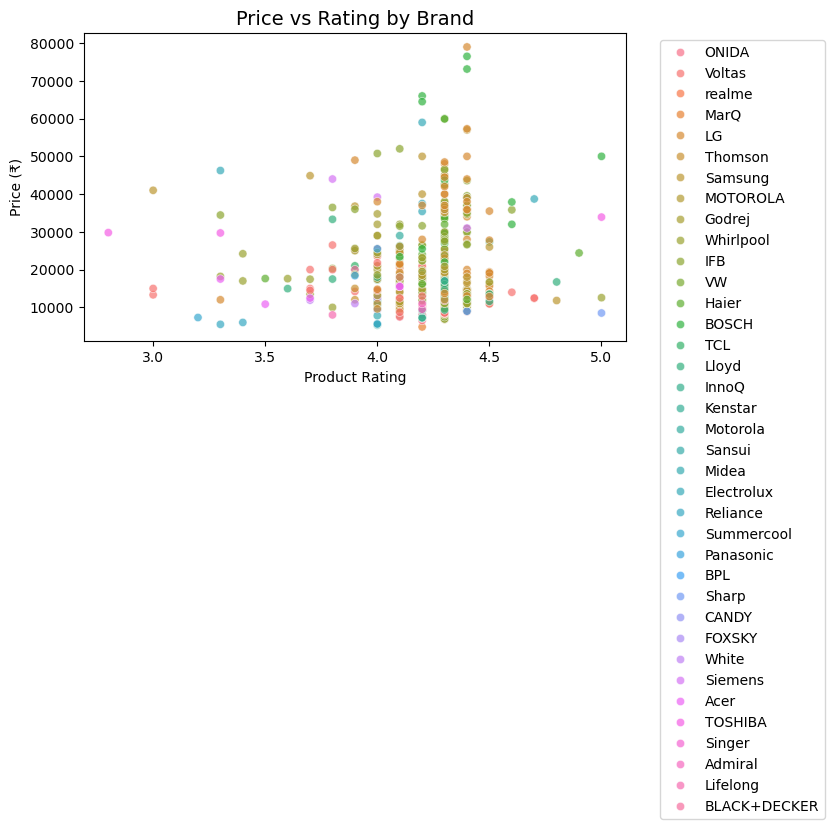

In [20]:
# Price vs Rating by Brand
plt.figure(figsize=(7, 4))
sns.scatterplot(data=df, x='Product Rating', y='Product Discount Price', hue='Brand', alpha=0.7)
plt.title('Price vs Rating by Brand', fontsize=14)
plt.xlabel('Product Rating')
plt.ylabel('Price (₹)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Observation
1. Most products cluster around high ratings

The majority of washing machines are rated between 4.0 and 4.5, indicating overall strong customer satisfaction across brands.

2. Higher price does NOT always mean higher rating

Expensive models (₹40,000–₹80,000) appear across similar rating ranges (~4.0–4.4) as mid-priced models.

This suggests ratings are influenced more by performance and reliability than price alone.

3. Premium brands show wider price spread

Brands like LG, Samsung, Bosch, IFB, Haier span from mid-range to premium pricing while maintaining good ratings.

These brands offer diverse product portfolios targeting different customer segments.

4. Budget brands still achieve good ratings

Brands such as MarQ, Thomson, InnoQ, Sansui offer products mostly under ₹20,000, yet many have ratings above 4.0.

Indicates strong value-for-money perception.

## MultiVariate Analysis

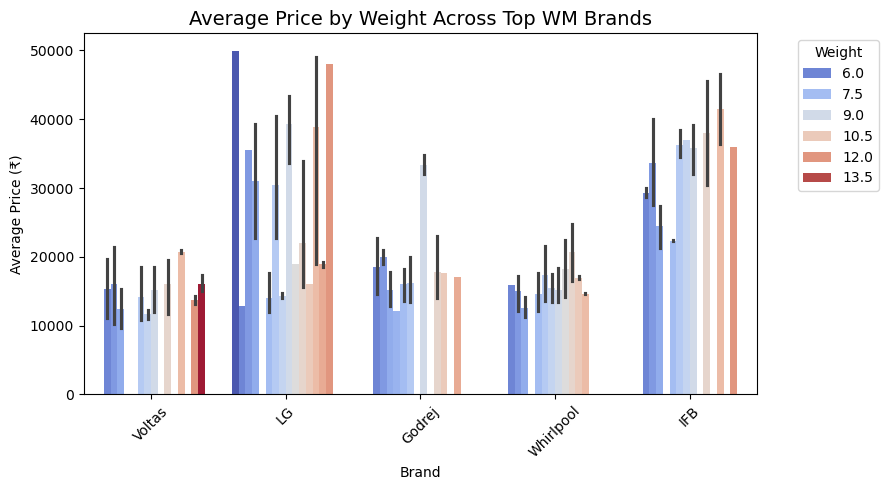

In [30]:
# Average Price by Weight Across Top WM Brands

# Filter top 5 brands
top_brands = df['Brand'].value_counts().nlargest(5).index
df_top = df[df['Brand'].isin(top_brands)]

plt.figure(figsize=(9, 5))
sns.barplot(data=df_top, x='Brand', y='Product Discount Price', hue='Weight_kg', estimator='mean', palette='coolwarm')
plt.title('Average Price by Weight Across Top WM Brands', fontsize=14)
plt.xlabel('Brand')
plt.ylabel('Average Price (₹)')
plt.legend(title='Weight', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Observation
1. Price increases with capacity (weight)

Across all top brands, higher weight (kg) washing machines generally have higher average prices.

This reflects increased drum size, motor capacity, and advanced features in higher-capacity models.

2. LG and IFB are premium-priced brands

LG shows the highest average prices, especially for 9 kg, 10.5 kg, and 12 kg models.

IFB consistently prices its products higher than Voltas, Godrej, and Whirlpool for the same weight categories.

Indicates premium positioning and advanced technology offerings.

3. Voltas is the most budget-friendly

Voltas maintains lower average prices across all weight segments, making it attractive for price-sensitive customers.

Even higher-capacity models remain comparatively affordable.

4. Godrej and Whirlpool occupy the mid-range

These brands show moderate pricing, positioned between budget (Voltas) and premium (LG, IFB).

Suitable for customers seeking balanced price and features.

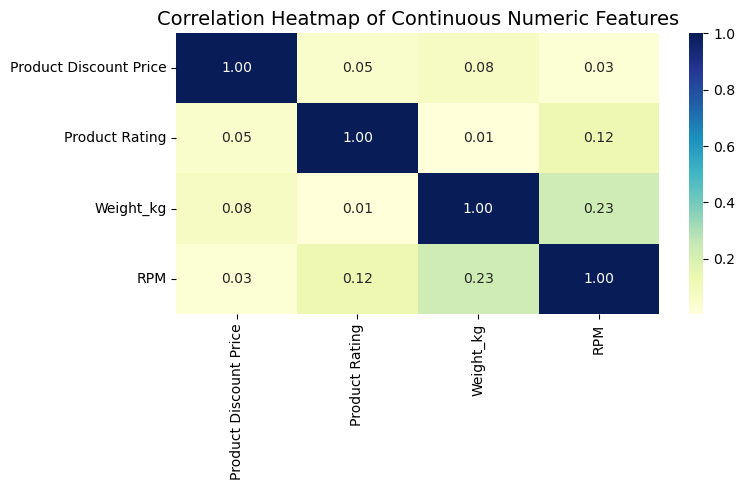

In [31]:
# Correlation Heatmap of Continuous Numeric Features
plt.figure(figsize=(8, 5))
numeric_cols = ['Product Discount Price', 'Product Rating', 'Weight_kg','RPM']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap of Continuous Numeric Features', fontsize=14)
plt.tight_layout()
plt.show()


### Observation
1.Overall weak correlations

Most correlation values are close to 0, indicating weak linear relationships among the numeric features.

This suggests pricing and ratings are influenced by multiple factors, not just a single numeric attribute.

2. Price vs Weight (0.08) – Very weak positive correlation

Slight tendency for higher-capacity washing machines to cost more, but the relationship is weak.

Confirms that brand, features, and technology play a bigger role than capacity alone.

3. Price vs RPM (0.03) – Almost no correlation

Spin speed (RPM) has minimal direct impact on price.

Higher RPM models are available across both budget and premium segments.

4. Price vs Rating (0.05) – Negligible correlation

Better customer ratings do not necessarily mean higher prices.

Highly rated models exist at multiple price points.

5. Weight vs RPM (0.23) – Weak positive correlation (strongest observed)

Higher-capacity machines slightly tend to have higher RPM.

Logical, as larger drums often need higher spin speeds for effective drying.

6. Rating vs RPM (0.12) – Weak relationship

Slight indication that higher RPM may contribute to marginally better customer satisfaction, but not a strong driver.

<Figure size 1000x800 with 0 Axes>

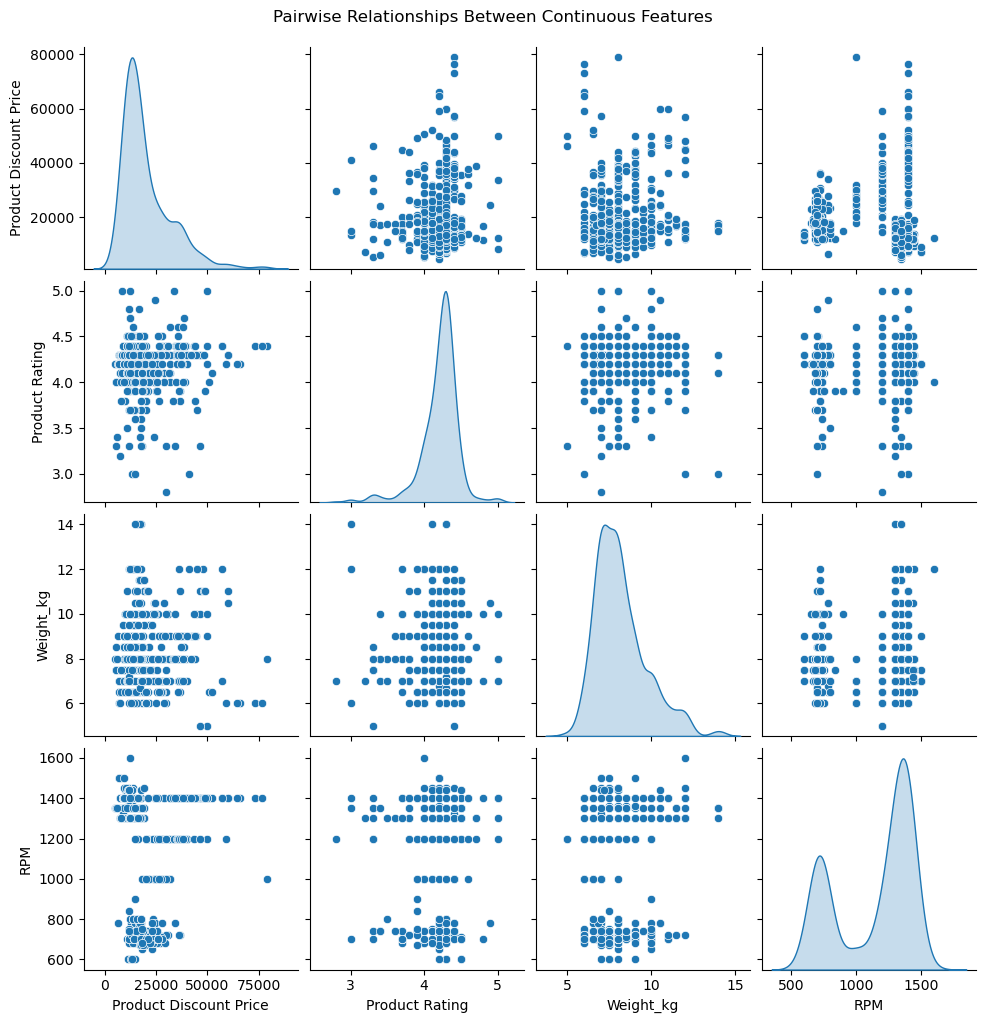

In [32]:
# Pairplot of Continuous Numeric Features

plt.figure(figsize=(10, 8))
sns.pairplot(df[['Product Discount Price', 'Product Rating', 'Weight_kg', 'RPM']], diag_kind='kde')
plt.suptitle('Pairwise Relationships Between Continuous Features', y=1.02)
plt.show()

In [ ]:
Observation

1️⃣ Price Distribution (Diagonal Plot)

The price distribution is right-skewed.

Majority of washing machines are priced between ₹10,000–₹25,000.

A small number of premium outliers exist above ₹50,000–₹80,000.

2️⃣ Rating Distribution

Ratings are highly concentrated between 3.8 and 4.5.

Very few products have ratings below 3.0, indicating generally positive customer feedback.

The distribution peaks around ~4.2, suggesting most models are well-rated.

3️⃣ Weight Distribution

Most washing machines fall in the 7–8 kg capacity range.

Lower (5–6 kg) and higher (10–14 kg) capacities are less common, indicating standard household preference.

4️⃣ RPM Distribution

RPM values appear in distinct bands (e.g., 700, 800, 1000, 1200, 1400).

This indicates standardized RPM options rather than continuous variation.

5️⃣ Price vs Rating

No strong linear relationship is visible.

Highly rated products exist across both budget and premium segments.

Price alone does not determine customer satisfaction.

6️⃣ Price vs Weight

Slight upward trend: higher capacity machines tend to cost more, but with wide variation.

Considerable price overlap across weight categories shows brand and features influence pricing more than capacity alone.

7️⃣ Price vs RPM

Prices increase slightly for higher RPM models, but significant overlap exists.

Higher RPM is not a strong standalone price driver.

8️⃣ Rating vs Weight / RPM

Ratings remain relatively consistent across different weights and RPMs.

Indicates performance and reliability matter more than raw specs.